In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [45]:
df = pd.read_csv("heart.csv") #https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
df.shape #find shape of dataframe
df.isnull().sum() #checks for null
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False) #removes any duplicate rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [47]:
model = LogisticRegression(max_iter=1000)

X = df[list(df.columns)[0:-1]].values
y = df['output'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state = 2)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [48]:
y_pred = model.predict(X_test)

#number of correctly predicted results (positive and negative)
print("accuracy: ", "{:.2%}".format(accuracy_score(y_test,y_pred)))
#print((y==y_pred).sum() / y.shape[0])

#TP = true positive, FP = false positive, TN = true negative, FN = false negative

# percentage of positives returned that were correct. TP/(TP/FP)
print("precision: ", "{:.2%}".format(precision_score(y_test,y_pred)))
# percentage of actual positives that were correct (TP/(TP+FN))
print("recall: ", "{:.2%}".format(recall_score(y_test,y_pred)))
# average of precision and recall
print("f1 score: ", "{:.2%}".format(f1_score(y_test,y_pred)))

accuracy:  86.81%
precision:  82.76%
recall:  96.00%
f1 score:  88.89%


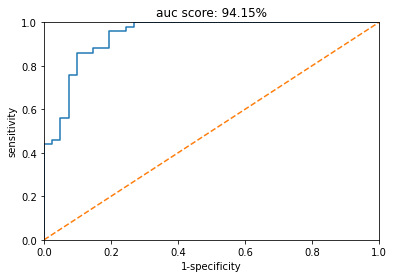

In [53]:
### ROC ###
#The threshold of 
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], linestyle= "--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.title("auc score: " + "{:.2%}".format(roc_auc_score(y_test,y_pred_proba[:,1])))
plt.show()